# Online News Popularity

We will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the dataset at the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and January 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


In [2]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

### Import the data 

In [3]:
# Import data
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

# Change into dataframe
df = pd.DataFrame(df)

# Drop variables url and timedelta
df = df.drop(columns = {'url'})
df = df.drop(columns = {' timedelta'})

# Export the predictor variable as a numpy array called *X* which does not include target variable (shares)
X_df = df.drop(columns = {' shares'})
X = X_df.values

# Shares as a separate numpy array
shares = df[' shares']
shares = shares.values

# Define an article to be popular if it received more shares than the median number of shares
# Create binary numpy array *y* which indicates whether or not each article is popular
y = df
y['y'] = np.where((y[' shares'] > y[' shares'].median()), 1, 0)
y_df = y['y']
y = y_df.to_numpy()

### Exploratory data analysis 

In [4]:
print("min:", np.min(shares))
print("median:", np.median(shares))
print("max:", np.max(shares))

min: 1
median: 1400.0
max: 843300


### Classification using k-NN

We develop a k-NN classification model for the data and use cross validation to choose the best value of k.

In [16]:
# k-NN classification model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
scores = []
k_range = range(1,100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
#     scores1.append(np.mean(y_pred != y_test))
    scores.append(metrics.accuracy_score(y_test, y_pred))

[0.5379303821415059, 0.5305839324000504, 0.5447723546474965, 0.5358809433724303, 0.548776642703998, 0.5426913860512045, 0.55177197628957, 0.5472316811703872, 0.553852944885862, 0.5495333585571951, 0.5586770084499937, 0.5523710430066843, 0.5587715979316433, 0.5536322360953462, 0.559559843612057, 0.553159288687098, 0.5603796191196873, 0.5553348467650397, 0.5623344684071131, 0.5560600327910203, 0.5633749527052592, 0.5578257031151469, 0.5636587211502081, 0.5570689872619498, 0.5628389456425779, 0.559843612057006, 0.5628704754697944, 0.5582986505233951, 0.564289317694539, 0.5586770084499937, 0.5636271913229915, 0.5583932400050448, 0.5620822297893807, 0.5588977172405095, 0.5637533106318577, 0.560190440156388, 0.5643208475217556, 0.561230924454534, 0.563248833396393, 0.5598120822297894, 0.5617984613444318, 0.5599697313658721, 0.5615146928994829, 0.5597805524025729, 0.5623975280615462, 0.5600327910203052, 0.5629335351242275, 0.5590553663765923, 0.5621768192710304, 0.5605057384285534, 0.56189305

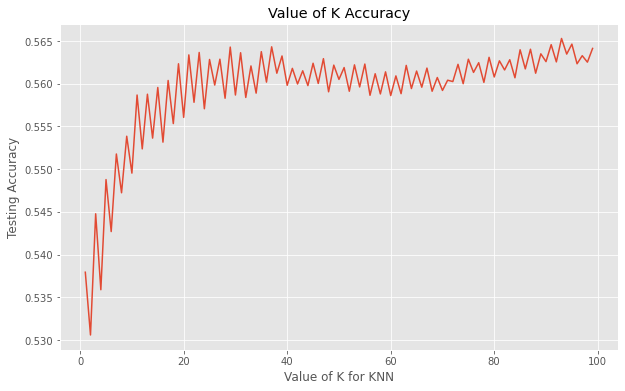

In [17]:
# Test accuracy
print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Value of K Accuracy")

plt.savefig('KNN-Accuracy1')

[0.5652982721654686, 0.5634695421869088, 0.5646361457939211, 0.5623344684071131, 0.5632803632236095, 0.5625236473704124, 0.5641316685584563, 0.5634695421869088, 0.56491991423887, 0.5636902509774246, 0.5651406230293858, 0.5630596544330937, 0.5636587211502081, 0.5621768192710304, 0.5646046159667045, 0.5626497666792786, 0.564289317694539, 0.5641316685584563, 0.5637217808046412, 0.5630281246058771, 0.5640055492495901, 0.5621768192710304, 0.5637217808046412, 0.5619561104805145, 0.5630596544330937, 0.5623344684071131, 0.5625867070248455, 0.5615462227266994, 0.5623344684071131, 0.5613570437634002, 0.5617669315172152, 0.5612939841089671, 0.5616092823811325, 0.5607264472190693, 0.5627128263337117, 0.5616723420355656, 0.5624290578887627, 0.5611363349728844, 0.5617038718627821, 0.5610102156640182, 0.5613885735906167, 0.56053726825577, 0.5615146928994829, 0.5610102156640182, 0.5619561104805145, 0.5607579770462858, 0.5614831630722663]


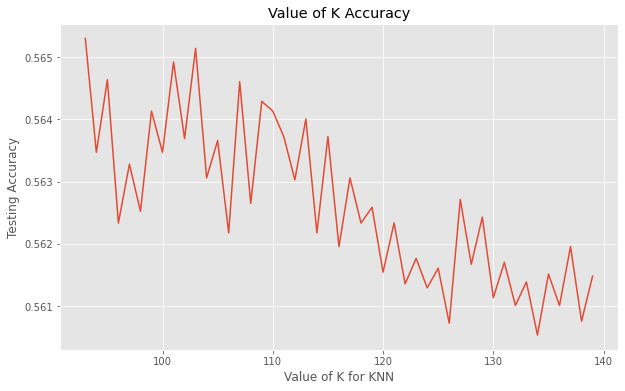

In [18]:
# k-NN classification model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
scores1 = []
k_range1 = range(93, 140)

# Cross validation for best value of k
for k in k_range1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores1.append(metrics.accuracy_score(y_test, y_pred))

# Test accuracy
print(scores1)
plt.plot(k_range1, scores1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Value of K Accuracy")

plt.savefig('KNN-Accuracy2')

In [19]:
# Show best accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
clf = KNeighborsClassifier(n_neighbors=93)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In [20]:
print(accuracy)

0.565897338882583


**Interpretation:** The best accuracy one can obtain from the test data is around 0.567 with k = 93.

### Classification using SVM

We now develop a support vector machine classification model for the data.

In [21]:
X_first = X_df.head(5000)
X_first.values
y_first = y_df.head(5000)
y_first.values

array([0, 0, 1, ..., 0, 1, 1])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_first, y_first, random_state=1, test_size=0.8)
for C in [1, 10, 100, 1000, 8100, 10000]:
    print("C is:", C)
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("Accuracy Train:", metrics.accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
    print("Accuracy Test:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
    print()

C is: 1
Accuracy Train: 0.562
Accuracy Test: 0.56175

C is: 10
Accuracy Train: 0.563
Accuracy Test: 0.56175

C is: 100
Accuracy Train: 0.563
Accuracy Test: 0.56175

C is: 1000
Accuracy Train: 0.586
Accuracy Test: 0.56625

C is: 8100
Accuracy Train: 0.6
Accuracy Test: 0.5815

C is: 10000
Accuracy Train: 0.602
Accuracy Test: 0.57775



[0.58125, 0.58125, 0.58125, 0.581, 0.58125, 0.58125, 0.58125, 0.5815, 0.58125, 0.58125, 0.5815, 0.58125, 0.5815, 0.58125, 0.58125, 0.5815, 0.58175, 0.5815, 0.5815, 0.5815]


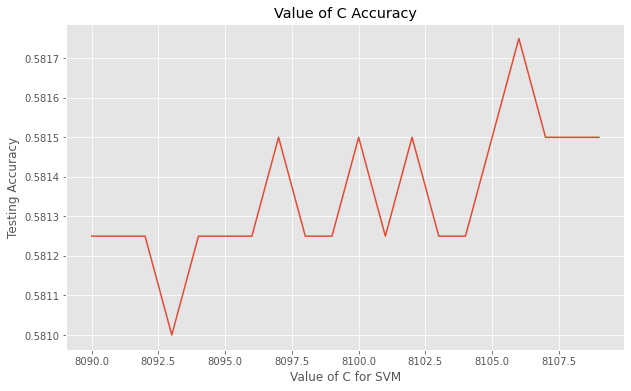

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_first, y_first, random_state=1, test_size=0.8)
scores2 = []
C_range = range(8090, 8110)
for C in C_range:
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores2.append(metrics.accuracy_score(y_test, y_pred))

print(scores2)
plt.plot(C_range, scores2)
plt.xlabel('Value of C for SVM')
plt.ylabel('Testing Accuracy')
plt.title('Value of C Accuracy')
plt.savefig('SVM-Accuracy')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_first, y_first, random_state=1, test_size=0.8)
clf = svm.SVC(kernel='rbf', C=8106)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

In [25]:
print(accuracy)

0.58175


### Classification using decision trees

Now we evelop a decision tree classification model for the data and use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [27]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.5)
features = [' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', 
            ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech',
            ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', 
            ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', 
            ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', 
            ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', 
            ' max_positive_polarity', ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity',
            ' abs_title_subjectivity', ' abs_title_sentiment_polarity']

In [28]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features,  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

max_depth: 5 min_sample_split: 10
Accuracy on test data=  0.6372717182928059
max_depth: 5 min_sample_split: 100
Accuracy on test data=  0.6370699223085461
max_depth: 5 min_sample_split: 200
Accuracy on test data=  0.6374735142770659
max_depth: 5 min_sample_split: 400
Accuracy on test data=  0.6375744122691959
max_depth: 5 min_sample_split: 800
Accuracy on test data=  0.6374230652810009
max_depth: 10 min_sample_split: 10
Accuracy on test data=  0.6190596307133488
max_depth: 10 min_sample_split: 100
Accuracy on test data=  0.6239027343355867
max_depth: 10 min_sample_split: 200
Accuracy on test data=  0.6318232267177883
max_depth: 10 min_sample_split: 400
Accuracy on test data=  0.6377762082534557
max_depth: 10 min_sample_split: 800
Accuracy on test data=  0.6355060034305318
max_depth: 15 min_sample_split: 10
Accuracy on test data=  0.590555947936636
max_depth: 15 min_sample_split: 100
Accuracy on test data=  0.6101806074059126
max_depth: 15 min_sample_split: 200
Accuracy on test data=  0

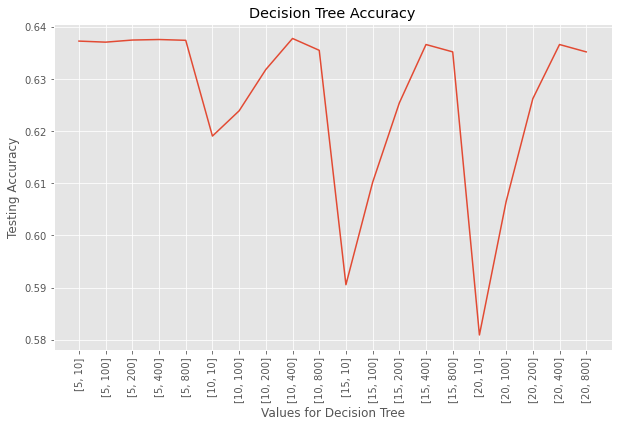

In [37]:
# Limiting Both
# double loop
# XTrain, XTest, yTrain, yTest = splitData(features)
depth = [5, 10, 15, 20]
split = [10, 100, 200, 400, 800]
scores3 = []
number = []
for a in depth:
    for b in split:
        print("max_depth:", a, "min_sample_split:", b)
        decisionTree = tree.DecisionTreeClassifier(max_depth=a, min_samples_split=b)
        decisionTree = decisionTree.fit(XTrain, yTrain)

        y_pred_train = decisionTree.predict(XTrain)

        y_pred = decisionTree.predict(XTest)
        print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

        scores3.append(metrics.accuracy_score(yTest, y_pred))
        num = [a,b]
        number.append(str(num))

# print(scores3)
plt.tick_params(axis='x', rotation=90)
plt.plot(number, scores3)
plt.xlabel('Values for Decision Tree')
plt.ylabel('Testing Accuracy')
plt.title('Decision Tree Accuracy')
plt.savefig('DecisionTree')
plt.show()

Accuracy on training data = 0.6657249520734537
Accuracy on test data = 0.6377762082534557


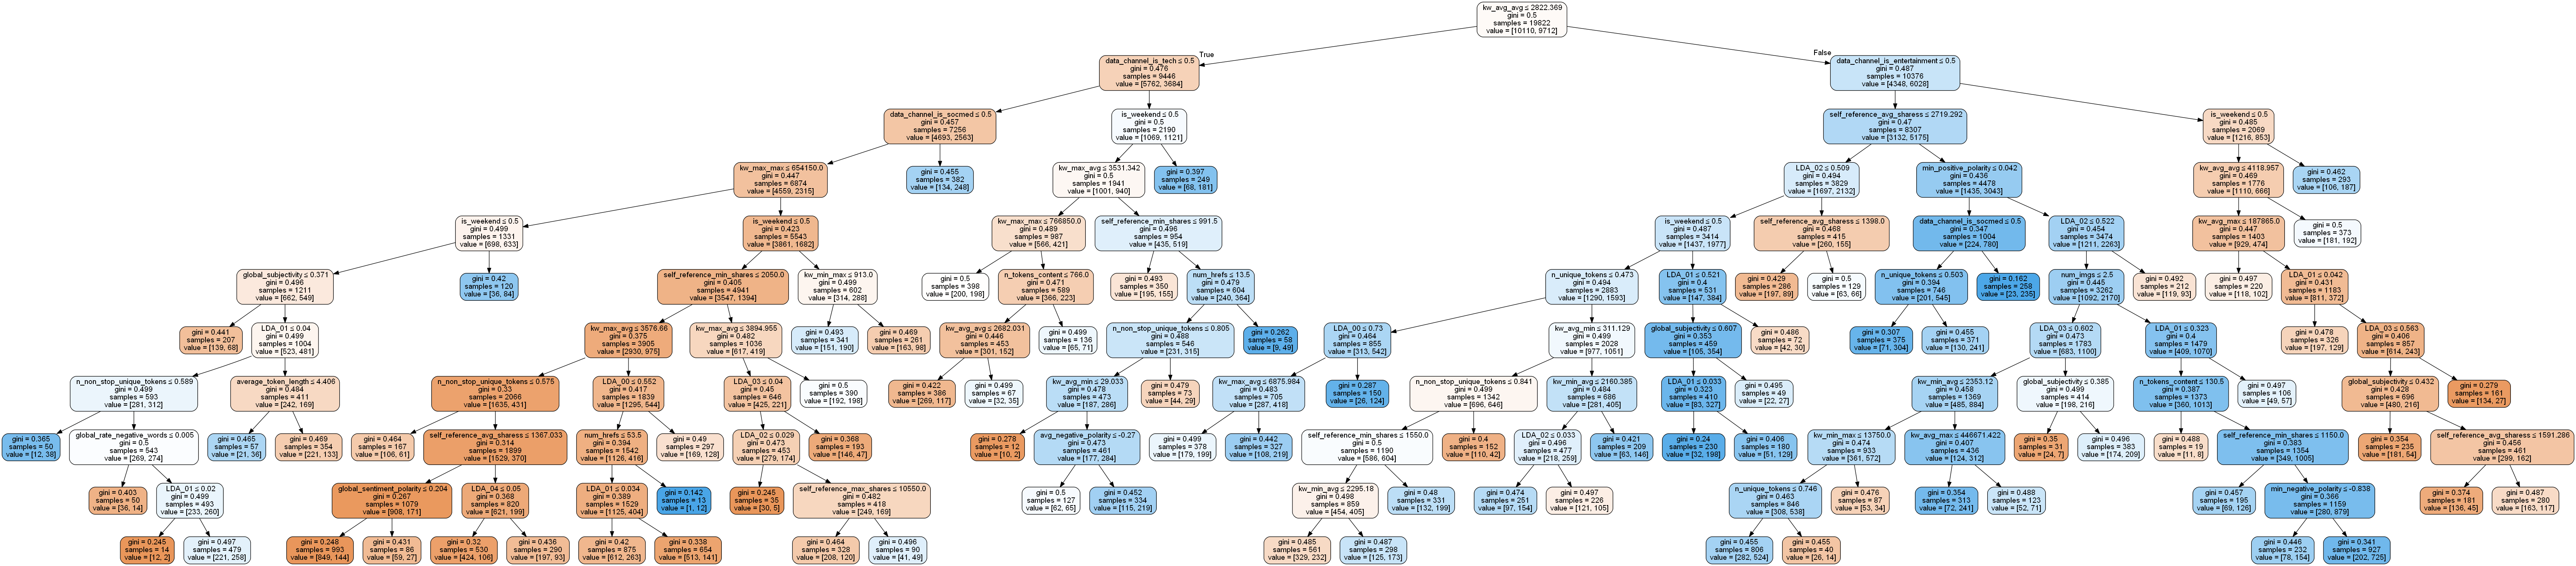

In [38]:
decisionTree = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=400)
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data =', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data =', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, features)

### Describe your findings


**Your Solution:** I believe the Decision Tree worked best with the highest accuracy achieved for the Test Data of 0.6377. For the K-NN classifier, the parameter k can infuence the accuracy. Choosing smaller values for k can be noisy and will have a higher influence on the result while larger values of k will have smoother decision boundaries which mean lower variance but increased bias. For the SVM classifier, a larger C decreases the final training error, but if you increase C too much you risk losing the generalization properties of the classifier because it will try to fit as best as possible all the training points. If C is small, then the classifier is flat. For Decision Trees, there is a risk of overfitting when the number is higher. All three have a certain "sweet spot" where the accuracy is maximized. The model that is the easiest to interpret is the Decision Tree model because the information can be expressed in a readable form. In the K-NN model, the test is accurate about 0.567 of the time. In the SVM model, the test is accurate about 0.581 of the time. In the Decision Tree, the test is accurate about 0.638 of the time.